In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats

In [2]:
# Load the data from the Excel file
data_path = 'CW_Data.xlsx'  # Replace with the correct path to your Excel file
data = pd.read_excel(data_path)

#
categories = data.iloc[:, 2]  # This selects the second column for categories
# features = data.iloc[:,3:]
features = data.drop(columns=['Index', 'Programme'])
  # This selects all columns after the second column for features

# print(categories.value_counts())
# print(features)

In [3]:
# df_plot = data.drop(columns=['Index'])
# import seaborn as sns
# # 绘制箱线图
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df_plot)
# plt.title('Box plot of raw data')
# plt.xticks(rotation=45)
# plt.show()

In [4]:
from scipy.stats import shapiro, normaltest
# 假设df是你的DataFrame

df = pd.DataFrame(features)

# # 使用Shapiro-Wilk测试检验正态性
# print("Shapiro-Wilk Test Results:")
# for column in df.columns:
#     stat, p = shapiro(df[column])
#     print(f"{column}: Statistics={stat:.3f}, p={p:.8f}")
    


In [5]:
# import pandas as pd

# # 假设df是你的主数据集DataFrame

# # 对'Total'进行等频分箱
# df['Total_Binned'] = pd.qcut(df['Total'], q=4, labels=False, duplicates='drop')

# # 对'MCQ'进行等频分箱
# df['MCQ_Binned'] = pd.qcut(df['MCQ'], q=4, labels=False, duplicates='drop')

# # 现在，'Total_Binned'和'MCQ_Binned'已经被添加到df中



In [6]:
# import seaborn as sns
# # 绘制箱线图
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df)
# plt.title('Box plot of raw data')
# plt.xticks(rotation=45)
# plt.show()


In [7]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
# 对DataFrame中的每一列应用Box-Cox变换
for column in df.columns:
    # 确保数据全为正，Box-Cox变换不能应用于0或负数
    data_box = df[column]
    data_box = data_box - np.min(data_box) + 1  
    transformed_data, best_lambda = stats.boxcox(data_box)
    df[column] = transformed_data

#     # 打印最佳lambda值和一些变换后的数据点以供检查
#     print(f'{column}: Best lambda = {best_lambda}')
#     print(f'Transformed {column} data sample:', transformed_data[:5])
    

In [8]:
# from scipy.stats import shapiro, normaltest
# # 假设df是你的DataFrame

# df = pd.DataFrame(df)

# # 使用Shapiro-Wilk测试检验正态性
# print("Shapiro-Wilk Test Results:")
# for column in df.columns:
#     stat, p = shapiro(df[column])
#     print(f"{column}: Statistics={stat:.3f}, p={p:.3f}")
#     # 或者，对于较大的样本，使用normaltest
# print("\nD’Agostino and Pearson's Test Results:")
# for column in df.columns:
#     stat, p = normaltest(df[column])
#     print(f"{column}: Statistics={stat:.3f}, p={p:.8f}")

In [9]:
# # 添加新的数据
df['Total_Q_Score'] = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']].sum(axis=1)
# # 将 'Gender' 和 'Grade' 组合起来创建一个新的分类特征
# data['Gender_Grade'] = data['Gender'].astype(str) + "_" + data['Grade'].astype(str)

# 使用 pandas 的 get_dummies 方法对新的组合特征进行 one-hot 编码
# one_hot_encoded_data = pd.get_dummies(data, columns=['Gender_Grade'])

# 现在 one_hot_encoded_data 包含了原始数据以及新的 one-hot 编码特征
# print(one_hot_encoded_data.head())
# print(data[['Total_Q_Score']])
# df_plot = df

# # 绘制箱线图
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df_plot)
# plt.title('Box plot of raw data')
# plt.xticks(rotation=45)
# plt.show()

In [10]:

# print(categories_cleaned.value_counts())
# # Normalize the feature data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
# scaler= MinMaxScaler()
features_scaled = scaler.fit_transform(df
                            )
# print(features_cleaned.info())

In [11]:
# from scipy.stats import shapiro, normaltest
# # 假设df是你的DataFrame
# feature_df = pd.DataFrame(features_scaled)
# # 使用Shapiro-Wilk测试检验正态性
# print("Shapiro-Wilk Test Results:")
# for column in feature_df.columns:  # 使用 feature_df 的列名作为迭代变量
#     stat, p = shapiro(feature_df[column])  # 确保使用的是 feature_df，而不是 df
#     print(f"{column}: Statistics={stat:.3f}, p={p:.5f}")

In [12]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=features_scaled)
# plt.title('Box plot of scaled data')
# plt.xticks(rotation=45)
# plt.show()

In [13]:
# explained_variance_ratios = []

# # 遍历特征数量
# for n_components in range(1, features_scaled.shape[1] + 1):
#     pca = PCA(n_components=n_components)
#     pca.fit(features_scaled)
#     explained_variance_ratio = np.sum(pca.explained_variance_ratio_)
#     explained_variance_ratios.append(explained_variance_ratio)

# # 绘制特征数量与累积解释方差比的关系
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, features_scaled.shape[1] + 1), explained_variance_ratios, marker="o")
# plt.title('Cumulative Explained Variance by Number of Features')
# plt.xlabel('Number of Features')
# plt.ylabel('Cumulative Explained Variance')
# plt.grid(True)
# plt.show()

In [14]:


# 先用 PCA 降维
pca = PCA(n_components=7 ,svd_solver = 'full')  
pca_result = pca.fit_transform(features_scaled)
#print(pca.components_)
print(pca.explained_variance_ratio_)
# print(pca_result)

[0.43765908 0.11978186 0.11523139 0.08848918 0.06718637 0.06650636
 0.05560306]


In [15]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=pca_result)
# plt.title('Box plot of pca result')
# plt.xticks(rotation=45)
# plt.show()

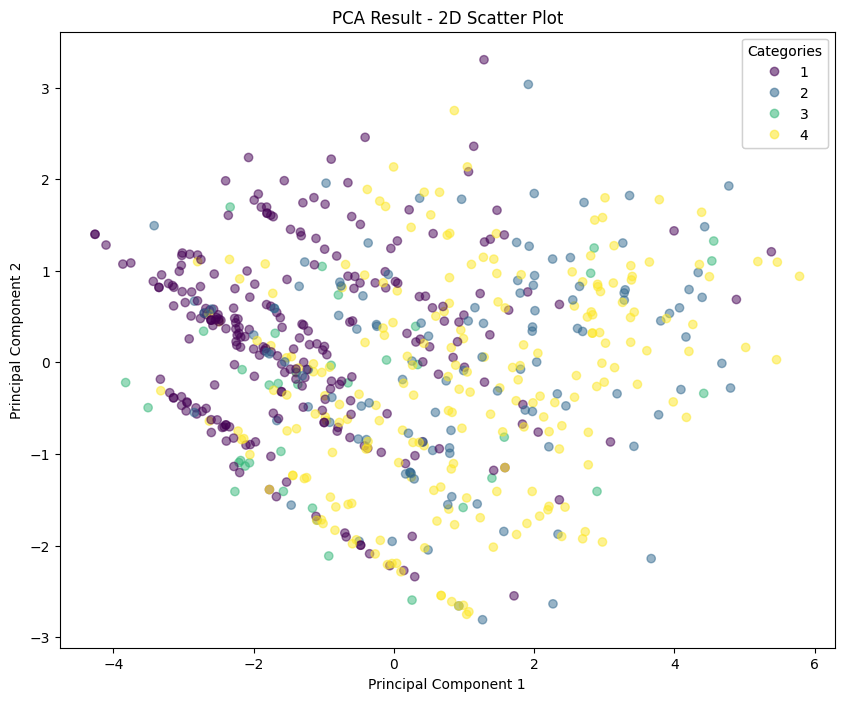

In [16]:
pca = PCA(n_components=7)  # 选择2个主成分
pca_result = pca.fit_transform(features_scaled)
pca_one = pca_result[:, 0]
pca_two = pca_result[:, 1]
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_one, pca_two, c=categories, alpha=0.5)
plt.title('PCA Result - 2D Scatter Plot')
legend1 = plt.legend(*scatter.legend_elements(), title="Categories")
plt.gca().add_artist(legend1)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.grid(True)
plt.show()

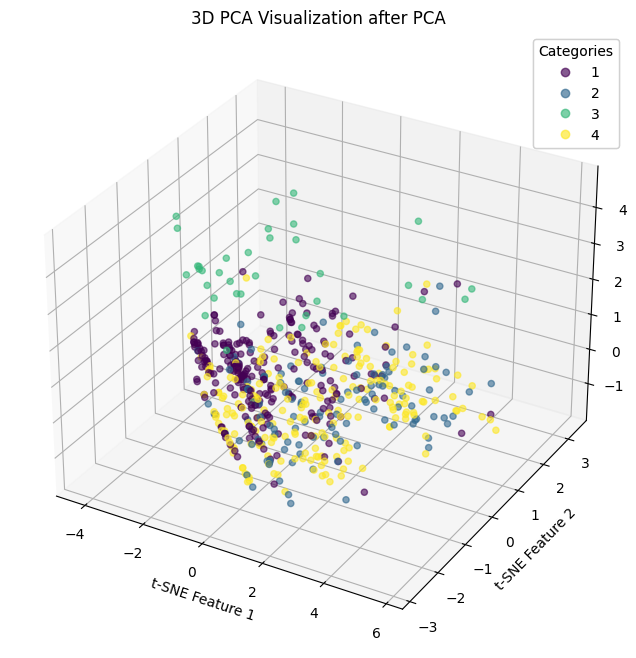

In [17]:
# 创建一个3D图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D散点图
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=categories, cmap='viridis', alpha=0.6)

# 创建图例
legend1 = ax.legend(*scatter.legend_elements(), title="Categories")
ax.add_artist(legend1)

# 设置坐标轴标签
ax.set_xlabel('t-SNE Feature 1')
ax.set_ylabel('t-SNE Feature 2')
ax.set_zlabel('t-SNE Feature 3')

# 设置图形标题
plt.title('3D PCA Visualization after PCA')

# 显示图形
plt.show()

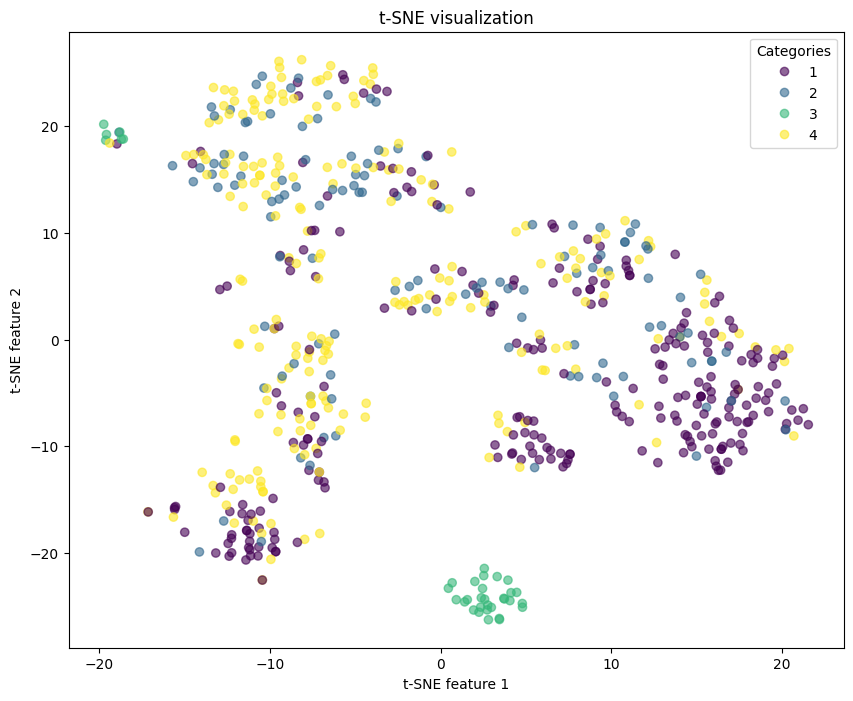

In [18]:
# 再用 t-SNE 降维
tsne = TSNE(n_components=2, random_state=42, perplexity=45, learning_rate=140)
tsne_result = tsne.fit_transform(features_scaled)

# 可视化 t-SNE 结果
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=categories, cmap='viridis', alpha=0.6)
plt.legend(handles=scatter.legend_elements()[0], labels=set(categories), title="Categories")
plt.title('t-SNE visualization')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


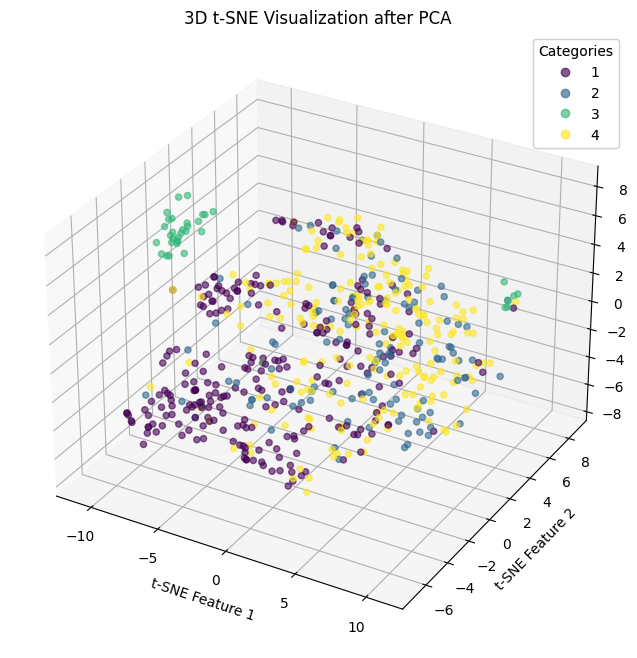

In [19]:
from mpl_toolkits.mplot3d import Axes3D  



# 使用 t-SNE 降维到3维
tsne = TSNE(n_components=3, random_state=42, perplexity=45, learning_rate=140)
tsne_result = tsne.fit_transform(features_scaled)

# 创建一个3D图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D散点图
scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=categories, cmap='viridis', alpha=0.6)

# 创建图例
legend1 = ax.legend(*scatter.legend_elements(), title="Categories")
ax.add_artist(legend1)

# 设置坐标轴标签
ax.set_xlabel('t-SNE Feature 1')
ax.set_ylabel('t-SNE Feature 2')
ax.set_zlabel('t-SNE Feature 3')

# 设置图形标题
plt.title('3D t-SNE Visualization after PCA')

# 显示图形
plt.show()


In [20]:
# # 实例化 LDA，并指定要降维到的维数，通常为类别数-1
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA(n_components=2)  # 降维到2维

# # 对特征数据进行 LDA 降维
# lda_result = lda.fit_transform(features, categories)

# # 可视化降维后的结果
# plt.figure(figsize=(10, 8))
# scatter = plt.scatter(lda_result[:, 0], lda_result[:, 1], c=categories, cmap='viridis', alpha=0.6)

# # 创建图例
# plt.legend(handles=scatter.legend_elements()[0], title="Classes")

# # 添加轴标签
# plt.xlabel('LDA Component 1')
# plt.ylabel('LDA Component 2')
# plt.title('LDA Visualization of the Iris Dataset')

# # 显示图形
# plt.show()

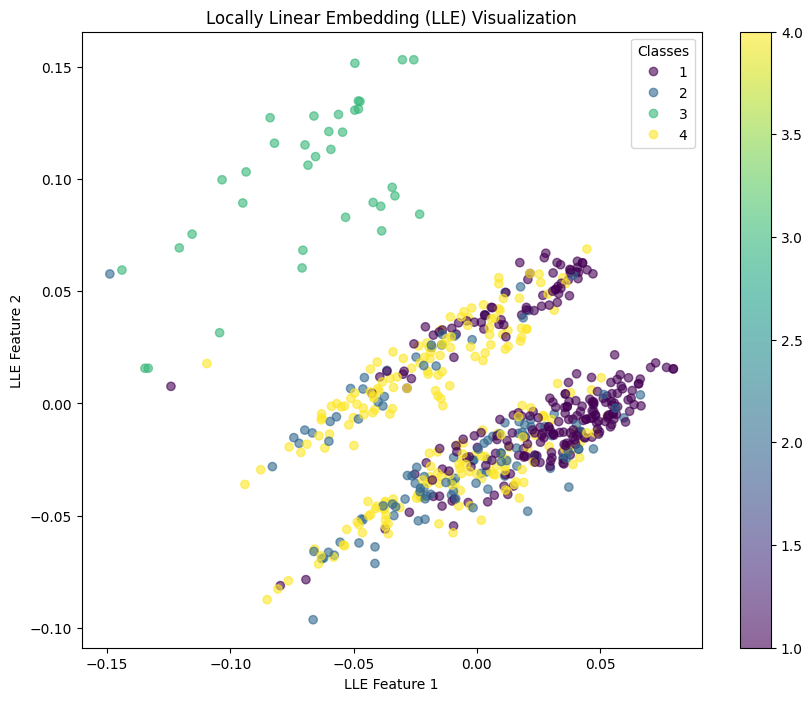

In [21]:
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 假设 'features' 是你的特征矩阵，'labels' 是对应的标签数组

# 实例化 LLE 对象
lle = LocallyLinearEmbedding(n_neighbors=120, n_components=2, method='standard')

# 使用 LLE 对特征进行降维
lle_result = lle.fit_transform(features_scaled)

# 可视化降维结果，假设 labels 包含了每个点的类别标签
plt.figure(figsize=(10, 8))
scatter = plt.scatter(lle_result[:, 0], lle_result[:, 1], c=categories, cmap='viridis', alpha=0.6)
plt.colorbar()  # 显示颜色条

# 如果 labels 是数字类别，可以用下面的代码创建图例
if np.issubdtype(categories.dtype, np.integer):
    # 为每个类别生成图例
    plt.legend(*scatter.legend_elements(), title="Classes")

plt.xlabel('LLE Feature 1')
plt.ylabel('LLE Feature 2')
plt.title('Locally Linear Embedding (LLE) Visualization')

plt.show()

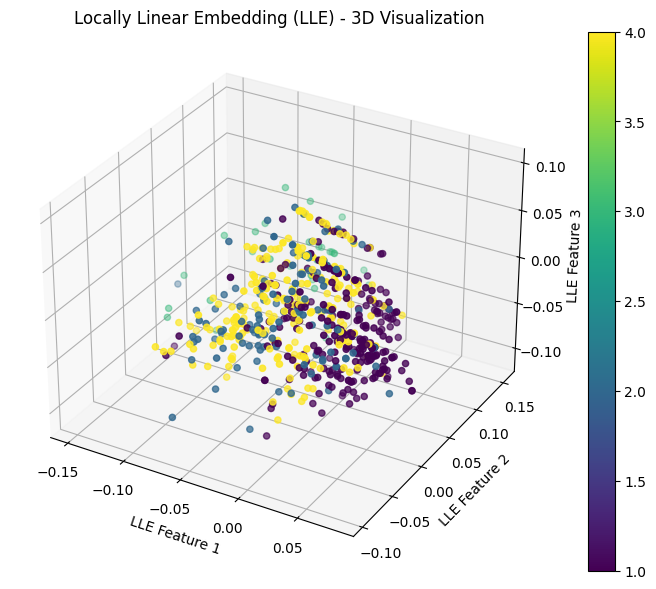

In [22]:
lle = LocallyLinearEmbedding(n_neighbors=120, n_components=3, method='standard', random_state=42)

# 对数据进行LLE降维
lle_result = lle.fit_transform(features_scaled)

# 创建3D散点图
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图
scatter = ax.scatter(lle_result[:, 0], lle_result[:, 1], lle_result[:, 2], c=categories, cmap='viridis')

# 添加颜色条
plt.colorbar(scatter)

# 设置图表标题和轴标签
ax.set_title('Locally Linear Embedding (LLE) - 3D Visualization')
ax.set_xlabel('LLE Feature 1')
ax.set_ylabel('LLE Feature 2')
ax.set_zlabel('LLE Feature 3')

# 显示图表
plt.show()

D:\python\python3.11.2\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


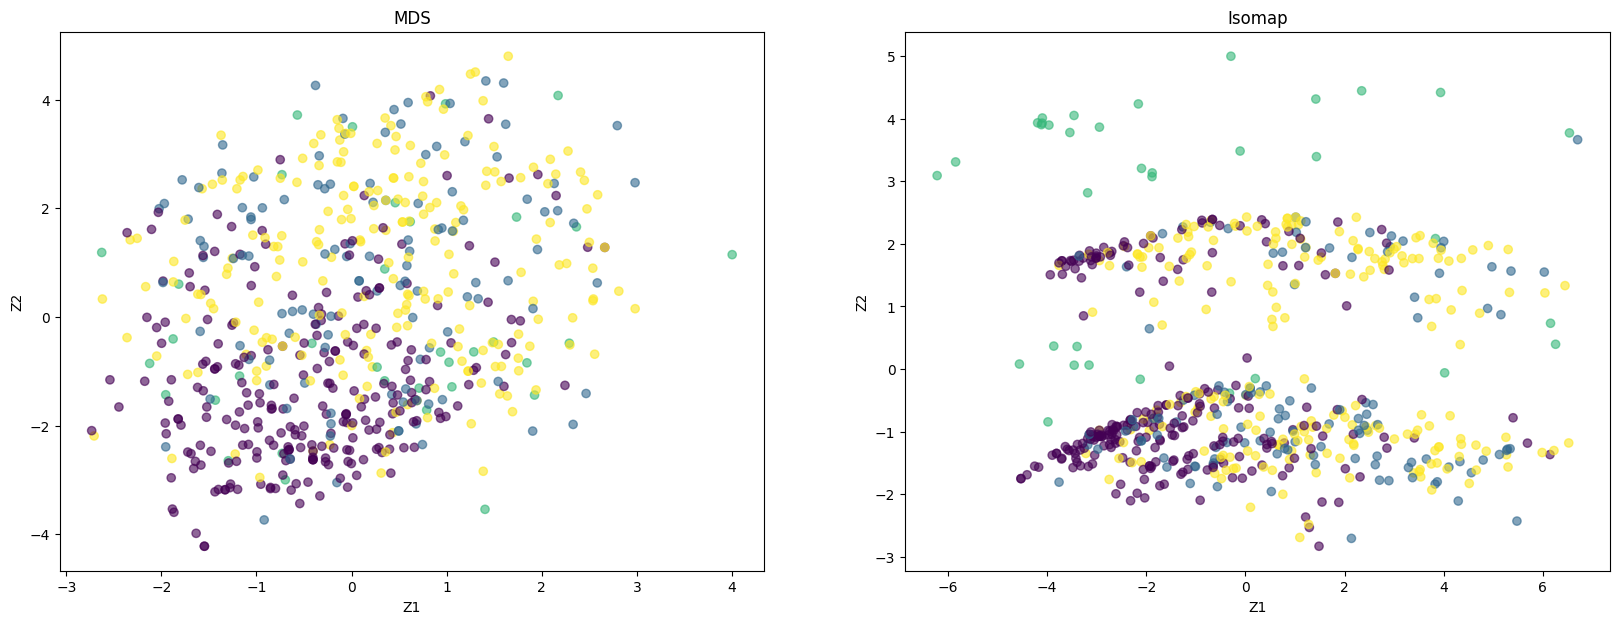

In [23]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS, Isomap
from sklearn.preprocessing import StandardScaler


# MDS
mds = MDS(n_components=4, random_state=42,metric = True)
mds_result = mds.fit_transform(features_scaled)

# Isomap
isomap = Isomap(n_components=5,n_neighbors = 100,eigen_solver = 'auto',path_method = 'auto',neighbors_algorithm ='auto')
isomap_result = isomap.fit_transform(features_scaled)


# 可视化代码
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# MDS
axes[0].scatter(mds_result[:, 0], mds_result[:, 1], c=categories, cmap='viridis', alpha=0.6)
axes[0].set_title('MDS')

# Isomap
axes[1].scatter(isomap_result[:, 0], isomap_result[:, 1], c=categories, cmap='viridis', alpha=0.6)
axes[1].set_title('Isomap')

# 设置坐标轴标题
for ax in axes:
    ax.set_xlabel('Z1')
    ax.set_ylabel('Z2')

# 显示图形
plt.show()


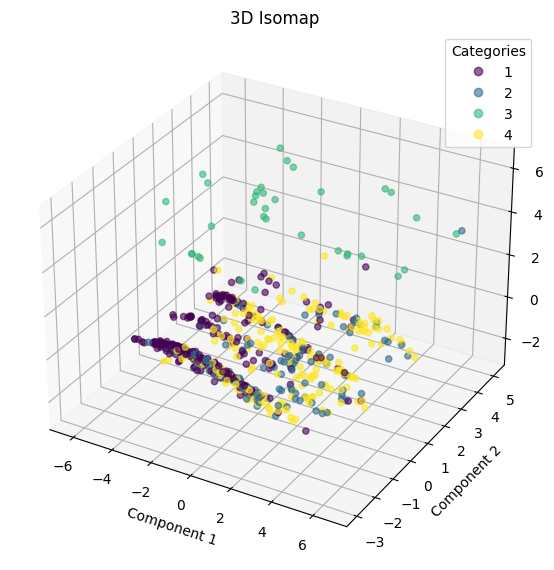

In [24]:
isomap = Isomap(n_components=8, n_neighbors =80, eigen_solver='auto', path_method='auto', neighbors_algorithm='auto')
isomap_result = isomap.fit_transform(features_scaled)
fig = plt.figure(figsize=(15, 7))
# Isomap 3D图
ax2 = fig.add_subplot(122, projection='3d')
sc = ax2.scatter(isomap_result[:, 0], isomap_result[:, 1], isomap_result[:, 2], c=categories, cmap='viridis', alpha=0.6)
ax2.set_title('3D Isomap')
ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_zlabel('Component 3')
plt.legend(*sc.legend_elements(), title="Categories")

# 显示图形
plt.show()